### Installation
1. Run the first 2 cells
2. Restart runtime
3. Run the rest of the jupyter notebooks (do not run the first 2 cells again)

In [14]:
!pip install gdown
!pip install --upgrade --no-cache-dir gdown
!gdown https://drive.google.com/drive/folders/1bebB-K5PkvgGqUrkyxt6eVeavIKwRhoI
!unzip Cleaned Images-20221025T143756Z-001.zip
!rm Cleaned Images-20221025T143756Z-001.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/drive/folders/1bebB-K5PkvgGqUrkyxt6eVeavIKwRhoI
To: /content/1bebB-K5PkvgGqUrkyxt6eVeavIKwRhoI
913kB [00:00, 37.5MB/s]
unzip:  cannot find or open Cleaned, Cleaned.zip or Cleaned.ZIP.
rm: cannot remove 'Cleaned': No such file or directory
rm: cannot remove 'Images-20221025T143756Z-001.zip': No such file or directory


In [2]:
# gpu
!pip install matplotlib numpy opencv-python pdbpp tensorboard tensorflow scipy Pillow gdown
# cpu
# !pip install matplotlib numpy opencv-python pdbpp tensorboard tensorflow-cpu scipy Pillow gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 6.6 MB/s 
  Created wheel for pyrepl: filename=pyrepl-0.9.0-py3-none-any.whl size=59907 sha256=2c56012f61d38ab02502e7c9183c8579f6b9a3b05ab24ebfb097f07d1a290a3e
  Stored in directory: /root/.cache/pip/wheels/3c/d7/37/7503eea89bb7987b7553bd90528a3554e3be0dd90b095c782c
  Created wheel for wmctrl: filename=wmctrl-0.4-py3-none-any.whl size=3857 sha256=160d96cf87fe412ab9b70ef24b6c0e50d10ba37c28ee8a531f7555ebdc90c21e
  Stored in directory: /root/.cache/pip/wheels/34/41/26/7eb2a9e48d9024b4607b7f684c55c9ce3a662e17b7a8b50e67
Successfully built pyrepl wmctrl


### Main Script

In [3]:
import tensorflow as tf
import sys
sys.path.append('./TF2DeepFloorplan/')
sys.path.append('./TF2DeepFloorplan/dfp')
from dfp.net import *
from dfp.data import *
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from argparse import Namespace
import os
import gc
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
sys.path.append('./TF2DeepFloorplan/dfp/utils/')
from dfp.utils.rgb_ind_convertor import *
from dfp.utils.util import *
from dfp.utils.legend import *
from dfp.deploy import *
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


<module 'dfp.utils._paths' from './TF2DeepFloorplan/dfp/utils/_paths.py'>
<module 'dfp._paths' from './TF2DeepFloorplan/dfp/_paths.py'>
True


In [4]:
inp = mpimg.imread('./TF2DeepFloorplan/resources/30939153.jpg')

In [5]:
args = Namespace(image='./TF2DeepFloorplan/resources/30939153.jpg',
        weight='./log/store/G',loadmethod='log',
        postprocess=True,colorize=True,
        save=None)
result = main(args)

58889256/58889256 [==============================] - 0s 0us/step


./TF2DeepFloorplan/dfp/utils/util.py:33: UserWarning: ignoring size because footprint is set
  ndimage.grey_erosion(output_array, size=(3, 3), footprint=el),


(600, 419, 3) (600, 419, 3)


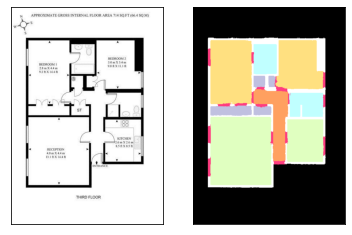

In [6]:
plt.subplot(1,2,1)
plt.imshow(inp); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(result); plt.xticks([]); plt.yticks([]);

## Breakdown of postprocessing (step by step)

In [7]:
model,img,shp = init(args)
logits_cw,logits_r = predict(model,img,shp)

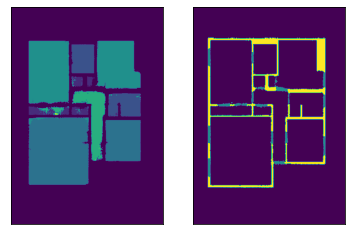

In [8]:
logits_r = tf.image.resize(logits_r,shp[:2])
logits_cw = tf.image.resize(logits_cw,shp[:2])
r = convert_one_hot_to_image(logits_r)[0].numpy()
cw = convert_one_hot_to_image(logits_cw)[0].numpy()
plt.subplot(1,2,1)
plt.imshow(r.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw.squeeze()); plt.xticks([]); plt.yticks([]);

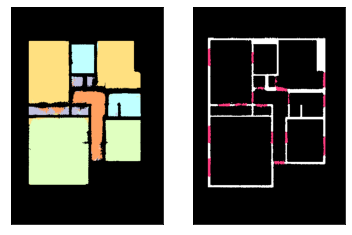

In [9]:
r_color,cw_color = colorize(r.squeeze(),cw.squeeze())
plt.subplot(1,2,1)
plt.imshow(r_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(cw_color); plt.xticks([]); plt.yticks([]);

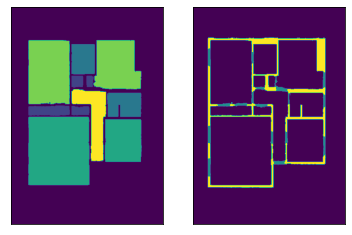

In [10]:
newr,newcw = post_process(r,cw,shp)
plt.subplot(1,2,1)
plt.imshow(newr.squeeze()); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(newcw.squeeze()); plt.xticks([]); plt.yticks([]);

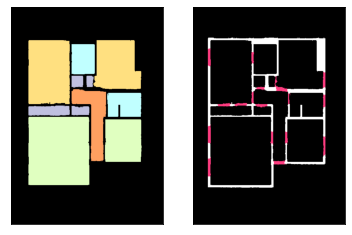

In [11]:
newr_color,newcw_color = colorize(newr.squeeze(),newcw.squeeze())
plt.subplot(1,2,1)
plt.imshow(newr_color); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2)
plt.imshow(newcw_color); plt.xticks([]); plt.yticks([]);

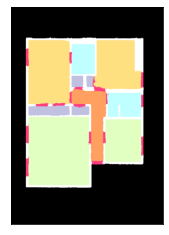

In [12]:
plt.imshow(newr_color+newcw_color); plt.xticks([]); plt.yticks([]);

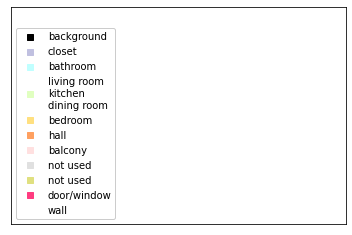

In [13]:
over255 = lambda x: [p/255 for p in x]
colors2 = [over255(rgb) for rgb in list(floorplan_fuse_map.values())]
colors = ["background", "closet", "bathroom",
          "living room\nkitchen\ndining room",
          "bedroom","hall","balcony","not used","not used",
          "door/window","wall"]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors2[i]) for i in range(len(colors))]
labels = colors
legend = plt.legend(handles, labels, loc=3,framealpha=1, frameon=True)

fig  = legend.figure
fig.canvas.draw()
plt.xticks([]); plt.yticks([]);
